<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tenpy-optimization" data-toc-modified-id="Tenpy-optimization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tenpy optimization</a></span><ul class="toc-item"><li><span><a href="#Model-definitions" data-toc-modified-id="Model-definitions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Model definitions</a></span><ul class="toc-item"><li><span><a href="#Def.-XXZ-MPO" data-toc-modified-id="Def.-XXZ-MPO-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Def. XXZ MPO</a></span></li></ul></li><li><span><a href="#Setup-variational-circuit-ansatz" data-toc-modified-id="Setup-variational-circuit-ansatz-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setup variational circuit ansatz</a></span></li><li><span><a href="#Optimize-the-variational-parameters" data-toc-modified-id="Optimize-the-variational-parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Optimize the variational parameters</a></span><ul class="toc-item"><li><span><a href="#Compare-to-DMRG-results-at-same-bond-dimension" data-toc-modified-id="Compare-to-DMRG-results-at-same-bond-dimension-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Compare to DMRG results at same bond-dimension</a></span></li><li><span><a href="#Look-at-correlation-functions" data-toc-modified-id="Look-at-correlation-functions-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Look at correlation functions</a></span></li></ul></li><li><span><a href="#Optimize-bond-prep-circuit" data-toc-modified-id="Optimize-bond-prep-circuit-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Optimize bond-prep circuit</a></span></li></ul></li><li><span><a href="#Simulate-in-Qiskit" data-toc-modified-id="Simulate-in-Qiskit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulate in Qiskit</a></span><ul class="toc-item"><li><span><a href="#Simulate-implementation-in-qiskit-(without-noise)" data-toc-modified-id="Simulate-implementation-in-qiskit-(without-noise)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simulate implementation in qiskit (without noise)</a></span><ul class="toc-item"><li><span><a href="#Postprocessing-functions" data-toc-modified-id="Postprocessing-functions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Postprocessing functions</a></span></li><li><span><a href="#Simulation-Parameters" data-toc-modified-id="Simulation-Parameters-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Simulation Parameters</a></span></li><li><span><a href="#Run-Sims-(Noiseless)" data-toc-modified-id="Run-Sims-(Noiseless)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Run Sims (Noiseless)</a></span></li></ul></li><li><span><a href="#Compare-Qiskit-and-Tenpy-results" data-toc-modified-id="Compare-Qiskit-and-Tenpy-results-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compare Qiskit and Tenpy results</a></span></li><li><span><a href="#Correlation-functions" data-toc-modified-id="Correlation-functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation functions</a></span></li><li><span><a href="#Noisy-Qiskit-Simulations" data-toc-modified-id="Noisy-Qiskit-Simulations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Noisy Qiskit Simulations</a></span><ul class="toc-item"><li><span><a href="#Noise-model" data-toc-modified-id="Noise-model-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Noise model</a></span></li><li><span><a href="#Run-Simulation" data-toc-modified-id="Run-Simulation-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Run Simulation</a></span></li></ul></li></ul></li><li><span><a href="#Thermal-state" data-toc-modified-id="Thermal-state-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Thermal state</a></span><ul class="toc-item"><li><span><a href="#Functions-to-compute-free-energy" data-toc-modified-id="Functions-to-compute-free-energy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Functions to compute free energy</a></span><ul class="toc-item"><li><span><a href="#Gradient-descent-function" data-toc-modified-id="Gradient-descent-function-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Gradient descent function</a></span></li></ul></li><li><span><a href="#Optimize-free-energy" data-toc-modified-id="Optimize-free-energy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Optimize free energy</a></span></li></ul></li><li><span><a href="#Dynamics" data-toc-modified-id="Dynamics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dynamics</a></span></li></ul></div>

In [12]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import sys
sys.path.append("..") # import one subdirectory up in files
#sys.path.append("..") # import one subdirectory up in files
#os.chdir("../holopy/")

# standard imports
import numpy as np
from scipy.optimize import minimize
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib
import time as time
#import json
import pickle

# 3rd party packages
import qiskit as qk
import qiskit.providers.aer.noise as noise
import tenpy as tp

## custom things
from networks.networks import IsoMPS
from networks.isonetwork import QKParamCircuit, IsoTensor
import circuits.basic_circuits as circuits
import mps.mps as mps



# Tenpy optimization
## Model definitions
Define some functions to create tenpy MPO for xxz model

### Def. XXZ MPO

In [128]:
## TENPY FUNCTION DEFINITIONS ##

from tenpy.models.model import CouplingMPOModel, NearestNeighborModel
from tenpy.tools.params import asConfig
from tenpy.networks.site import SpinHalfSite
from tenpy.networks.mps import MPS

__all__ = ['XXZModel', 'XXChain']
class XXZModel(CouplingMPOModel):
    def init_sites(self, model_params):
        conserve = model_params.get('conserve', 'parity')
        assert conserve != 'Sz'
        if conserve == 'best':
            conserve = 'parity'
            if self.verbose >= 1.:
                print(self.name + ": set conserve to", conserve)
        site = SpinHalfSite(conserve=conserve)
        return site
    def init_terms(self, model_params):
        J = np.asarray(model_params.get('J', 1.))
        d = np.asarray(model_params.get('d', 1.))
        for u1, u2, dx in self.lat.pairs['nearest_neighbors']:
            self.add_coupling(J, u1, 'Sigmax', u2, 'Sigmax', dx)
            self.add_coupling(J, u1, 'Sigmay', u2, 'Sigmay', dx)
            self.add_coupling(J*d, u1, 'Sigmaz', u2, 'Sigmaz', dx)
        # done
class XXZChain(XXZModel, NearestNeighborModel):
    def __init__(self, model_params):
        model_params = asConfig(model_params, self.__class__.__name__)
        model_params.setdefault('lattice', "Chain")
        CouplingMPOModel.__init__(self, model_params)
        
def DMRG_xxz_infinite(J,Delta,chi_max = 4, verbose=False):
    model_params = dict(L=2, J=J, d=Delta, bc_MPS='infinite', conserve=None, verbose=verbose)
    M = XXZChain(model_params)
    product_state = ["down"] * M.lat.N_sites
    psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
    dmrg_params = {
        'mixer': True,  # setting this to True helps to escape local minima
        'trunc_params': {
            'chi_max': chi_max,
            'svd_min': 1.e-6
        },
        'max_E_err': 1.e-6,
        'verbose': verbose,
    }
    # Sometimes, we want to call a 'DMRG engine' explicitly
    eng = tp.algorithms.dmrg.TwoSiteDMRGEngine(psi, M, dmrg_params)
    E, psi = eng.run()  # equivalent to dmrg.run() up to the return parameters.
    print("E = {E:.13f}".format(E=E))
    print("final bond dimensions: ", psi.chi)
    mag_x = np.mean(psi.expectation_value("Sigmax"))
    mag_z = np.mean(psi.expectation_value("Sigmaz"))
    print("<sigma_x> = {mag_x:.5f}".format(mag_x=mag_x))
    print("<sigma_z> = {mag_z:.5f}".format(mag_z=mag_z))
    print("correlation length:", psi.correlation_length())
    return E, psi, M

def xxz_mpo(J,Delta,hz=0,L=1):
    model_params = dict(J=J, d=Delta, bc_MPS='infinite', conserve=None, verbose=False)
    return XXZChain(model_params).H_MPO

def xxz_mpo_finite(J,Delta,hz,L):
    model_params = dict(L=L,
                        J=J, 
                        d=Delta, 
                        bc_MPS='finite', 
                        conserve=None, verbose=False)
    return XXZChain(model_params).H_MPO

#def xxz_mpo(J, Delta, hz, N=1, bc='infinite'):
#    site = tp.networks.site.SpinHalfSite(None)
#    Id, Sp, Sm, Sz = site.Id, site.Sp, site.Sm, 2*site.Sz
#    W_bulk = [[Id, Sp, Sm, Sz, -hz * Sz],
#              [None, None, None, None, 0.5 * J * Sm],
#              [None, None, None, None, 0.5 * J * Sp],
#              [None, None, None, None, J * Delta * Sz],
#              [None, None, None, None, Id]]
#    H = tp.networks.mpo.MPO.from_grids([site], [W_bulk], bc, IdL=0, IdR=-1) # (probably leave the IdL,IdR)
#    return H

#def xxz_mpo(J, Delta, hz, N=1, bc='infinite'):
#    site = tp.networks.site.SpinHalfSite(None)
#    Id, Sp, Sm, Sz = site.Id, site.Sp, site.Sm, 2*site.Sz
#    W_bulk = [[Id, Sp, Sm, Sz, -hz * Sz],
#              [None, None, None, None, 0.5 * J * Sm],
#              [None, None, None, None, 0.5 * J * Sp],
#              [None, None, None, None, J * Delta * Sz],
#              [None, None, None, None, Id]]
    #W_first = [W_bulk[0]]  # first row
    #W_last = [[row[-1]] for row in W_bulk]  # last column
    #Ws = [W_first] + [W_bulk]*(N - 2) + [W_last]
#    H = tp.networks.mpo.MPO.from_grids([site]*N, [W_bulk]*N, bc, IdL=0, IdR=-1) # (probably leave the IdL,IdR)
#    return H

# tenpy energy calculator
def energy_tp(param_vals,*args):
    """
    function to calculate energy using MPO/MPS contraction in tenpy
    inputs:
        - param_vals = dict {parameter:value}
        - *args, 
            args[0] should be psi: state as IsoMPS
            args[1] should be H_mpo: Hamiltonian as MPO
        (input made this way to be compatible w/ scipy.optimize)
    outputs:
        - float, <psi|H|psi> computed w/ tenpy
    """
    # parse inputs
    psi=args[0] # state as isoMPS    
    H_mpo = args[1] # Hamiltonian as tenpy MPO
    param_dict = dict(zip(psi.param_list,param_vals))
    
    # convert state from holoPy isoMPS to tenpy MPS
    psi_tp = psi.to_tenpy(param_dict,L=np.inf)
    
    # compute energy
    E = (H_mpo.expectation_value(psi_tp)).real
    return E

def energy_tp_corr(param_vals,*args):
    psi=args[0]
    J,Delta,h = args[1]
    psi_tp=psi.to_tenpy(opt_params,L=np.inf)
    Cxx_tp = np.mean([4*psi_tp.correlation_function("Sx", "Sx", 
                                                 sites1=[j], 
                                                 sites2=[j+1],
                                                 opstr=None, str_on_first=False, hermitian=False, autoJW=False)
                      for j in range(l_uc)])
    Cyy_tp = np.mean([4*psi_tp.correlation_function("Sy", "Sy", 
                                                 sites1=[j], 
                                                 sites2=[j+1],
                                                 opstr=None, str_on_first=False, hermitian=False, autoJW=False)
                      for j in range(l_uc)])
    Czz_tp = np.mean([4*psi_tp.correlation_function("Sz", "Sz", 
                                                 sites1=[j], 
                                                 sites2=[j+1],
                                                 opstr=None, str_on_first=False, hermitian=False, autoJW=False)
                      for j in range(l_uc)])
    return J*(Cxx_tp+Cyy_tp+Delta*Czz_tp)

## Setup variational circuit ansatz
Setup variational circuit ansatz
Strategy: two-site unit-cell, with star-circuit of xxz-gates:

$$U_{xxz}(\theta,\phi) = \exp[-i\theta/2 (X_1X_2+Y_1Y_2) - i\phi/2(Z_1Z_2)] $$

and initial state for qubits alternates between $|\uparrow\rangle$, $|\downarrow\rangle$ on even/odd sites of the unit-cell

First, define the parameters of the model and circuit:

In [15]:
## HYPERPARAMETERS ##
# model (xxz)
J = 1.0 # spin-exchange
Delta = 1.25 # Ising-anisotropy
hz = 0.0 # z-field

# ansatz parameters
nb = 2 # number of bond-qubits 
L = 1 # number of unit cells
l_uc = 2 # number of sites in unit cell
n_site_param = 2*nb # number of circuit parameters per site


Next, setup the circuit as a parameterized circuit in qiskit (which we package as a QKParamCircuit, and create a holopy IsoMPS object from)

Note: here, I haven't setup the bond-qubit initialization circuit (bond_prep_circ): this doesn't effect tenpy-part which computes for infinite boundary conditions.

To-do: optimize bond-qubit initialization circuit to minimize required burn-in

In [16]:
## CREATE ISOMPS FROM PARAMETERIZED CIRCUIT ANSATZ ##
# initialize registers
preg = qk.QuantumRegister(1,'p') # physical qubits
breg = qk.QuantumRegister(nb,'b') # bond qubits
#creg = qk.ClassicalRegister(L*l_uc+nb,'m') # classical register to hold measurement outcomes

## Site Circuits ##
site_pcircs=[]

# create list of circuits, one for each site in the unit cell (uc)
site_circs = [qk.QuantumCircuit(preg,breg) for j in range(l_uc)]
# create a list of parameter-lists, (one list of parameters per site in uc)
site_circ_params = [[qk.circuit.Parameter('s'+str(j)+'_'+str(k))
                     for k in range(n_site_param)] 
                    for j in range(l_uc)]
site_pcircs=[] # list of QKParamCirc's for each site in uc
for j in range(l_uc):
    if j%2==0: site_circs[j].x(preg[0]) # alternating 10101010... for physical qubit
    
    # star circuit of xxz-type 2-qubit gates
    for k in range(nb): 
        circuits.add_xxz_circ(site_circs[j], 
                              preg[0], breg[k], 
                              site_circ_params[j][2*k:2*(k+1)])
    # combine into parameterized circuit
    site_pcircs += [QKParamCircuit(site_circs[j], site_circ_params[j])]

# create holopy isoMPS 
#(without boundary circuit for now, since we'll optimize energy as iMPS)
psi = IsoMPS(preg,breg,site_pcircs,L=1)#,boundary_circuit=bond_prep_pcirc,L=1)

print('circuits for each site in uc:')
#site_circs[1].draw('mpl')

circuits for each site in uc:


In [177]:
params = dict(zip(psi.param_list,np.random.randn(len(psi.param_list))))
psi.tensors(params)[0].shape

{Parameter(s0_0): 0.8033245104290663,
 Parameter(s0_1): 3.302975774422488,
 Parameter(s0_2): -1.9564106796421945,
 Parameter(s0_3): 1.1970864458728199,
 Parameter(s1_0): -1.4880491771638977,
 Parameter(s1_1): 3.4588469972715243,
 Parameter(s1_2): -0.710149038859055,
 Parameter(s1_3): -2.6195049624258258}

## Optimize the variational parameters 
Minmize the variational energy using scipy.optimize

In [169]:
## OPTIMIZE CIRCUIT PARAMETERS CLASSICALLY IN TENPY ##
# create tenpy mpo
H_mpo = xxz_mpo(J=J,hz=hz,Delta=Delta)


x0 = np.pi*np.random.randn(psi.n_params) # starting point for parameters
t0 = time.time()
opt_result = minimize(energy_tp, # function to minimize
                      x0, # starting point for parameters 
                      args=(psi,H_mpo), # must take form (isoMPS,tenpy MPO, Length)
                      method='BFGS'
                     )
tf = time.time()
# set parameters to previously optimized values
opt_vals = opt_result.x
opt_params = dict(zip(psi.param_list,opt_vals))
E_gs_tp = opt_result.fun
print('Optimization done, elapsed time: {}'.format(tf-t0))
print('Optimized energy = {}'.format(E_gs_tp))
print('Optimized parameters')
print(opt_params)

Optimization done, elapsed time: 130.029443025589
Optimized energy = -1.901016250587692
Optimized parameters
{Parameter(s0_0): 0.8033245104290663, Parameter(s0_1): 3.302975774422488, Parameter(s0_2): -1.9564106796421945, Parameter(s0_3): 1.1970864458728199, Parameter(s1_0): -1.4880491771638977, Parameter(s1_1): 3.4588469972715243, Parameter(s1_2): -0.710149038859055, Parameter(s1_3): -2.6195049624258258}


In [19]:
## good variational parameters for nb=2=l_uc
# saved from previous optimization run
## chosen from a couple of runs based on matching dmrg
good_param_vals = np.array([-5.47986438,-2.98024345, -1.18519139,
                            1.19707353, -1.48805789,  3.45880091,
                            2.43144225,  3.66370337])
#if use_bond_prep:
#    good_param_vals = np.concatenate((np.zeros(n_bond_params),good_param_vals))
#opt_params = dict(zip(psi.param_list,good_param_vals))
print(opt_params)

{Parameter(s0_0): 4.7951409361757005, Parameter(s0_1): -3.4588934903886415, Parameter(s0_2): -6.993335158295649, Parameter(s0_3): 5.76110894059765, Parameter(s1_0): 0.8033237920324279, Parameter(s1_1): 2.980129522695707, Parameter(s1_2): 8.23960271603997, Parameter(s1_3): -4.338695218607367}


### Compare to DMRG results at same bond-dimension

In [20]:
chi = 2**nb # DMRG w/ same bond-dimension as vqe
#chi = 32 # DMRG w/ larger bond dimension ("exact")
E_dmrg,psi_dmrg,H_mpo = DMRG_xxz_infinite(J,Delta,chi_max = chi, verbose=True)

print()
print('-- done --')
print('DMRG GS energy = {:0.2F}'.format(E_dmrg))
print('Tenpy-vqe GS energy = {:0.2F}'.format(E_gs_tp))
print('Relative percent error = {:0.2F}%'.format(100*(1-E_gs_tp/E_dmrg)))

Reading 'bc_MPS'='infinite' for config XXZChain
Reading 'conserve'=None for config XXZChain
Reading 'L'=2 for config XXZChain
Reading 'J'=1.0 for config XXZChain
Reading 'd'=1.25 for config XXZChain
Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Updating environment
.
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 128
Energy = -1.9128677841849466, S = nan, norm_err = 2.9e-05
Current memory usage 215528.0 MB, time elapsed: 3.5 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.6159e-03, max_E_trunc = 1.4462e-02
MPS bond dimensions: [4, 4]
disable mixer after 15 sweeps, final amplitude 3.05e-10
Updating environment
.....
sweep 20, age = 248
Energy = -1.9128693727109720, S = 0.5971810004699853, norm_err = 3.8e-09
Current memory usage 215528.0 MB, time elapsed: 5.5 s
Delta E = -1.5885e-07, Delta S = nan (per sweep

/Users/acpotter/anaconda3/envs/tenpy/lib/python3.9/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


### Look at correlation functions

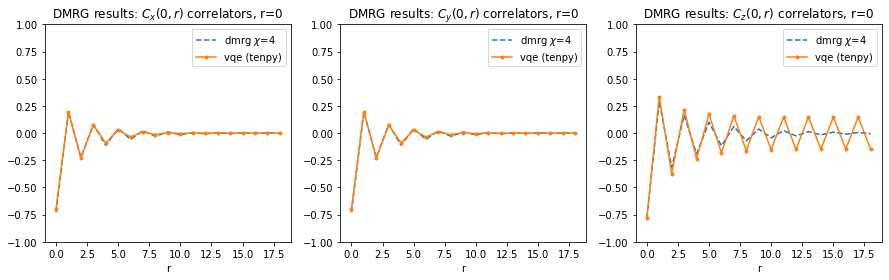

In [21]:
sites1 = [0]
sites2 = [j for j in range(1,20)]

# Correlators from DMRG
C_dmrg = {}
C_dmrg['x'] = 4*psi_dmrg.correlation_function("Sx", "Sx",sites1=sites1,sites2=sites2)
C_dmrg['y'] = 4*psi_dmrg.correlation_function("Sx", "Sx",sites1=sites1,sites2=sites2)
C_dmrg['z'] = 4*psi_dmrg.correlation_function("Sz", "Sz",sites1=sites1,sites2=sites2)

# correlators from qMPS/vqe
psi_tp=psi.to_tenpy(opt_params,L=np.inf)
C_tpvqe = {}
C_tpvqe['x'] = 4*psi_tp.correlation_function("Sx", "Sx",sites1=sites1,sites2=sites2)
C_tpvqe['y'] = 4*psi_tp.correlation_function("Sx", "Sx",sites1=sites1,sites2=sites2)
C_tpvqe['z'] = 4*psi_tp.correlation_function("Sz", "Sz",sites1=sites1,sites2=sites2)

plt.figure(figsize=(15,4))
for j,b in enumerate(['x','y','z']):
    plt.subplot(1,3,j+1)
    plt.plot(C_dmrg[b][0],'--')
    plt.plot(C_tpvqe[b][0],'.-')
    plt.legend(['dmrg $\chi$={}'.format(chi),'vqe (tenpy)'])
    plt.title('DMRG results: $C_'+b+'(0,r)$ correlators, r=0')
    plt.ylim([-1,1])
    plt.xlabel('r')

## Optimize bond-prep circuit

In [22]:
## Create Bond-Prep circuit
if nb==1: n_bond_params=3
elif nb==2: n_bond_params=15 
    
# setup parameters
bond_prep_params = [qk.circuit.Parameter('bp_'+str(j)) 
                    for j in range(n_bond_params)]
bond_prep_circ = qk.QuantumCircuit(breg)
# use arbitrary one or two-qubit gates for 
if nb==1: circuits.add_1q_circ(bond_prep_circ, breg[0], bond_prep_params) 
elif nb==2: circuits.add_su4_circ(bond_prep_circ, breg[0],breg[1], bond_prep_params) 

# turn into custom parameterized circuit object
bond_prep_pcirc = QKParamCircuit(bond_prep_circ,bond_prep_params)

# create isoMPS with boundary circuit
psi_bdry = IsoMPS(preg,breg,site_pcircs,L=1,boundary_circuit = bond_prep_pcirc)
bdry_node = psi_bdry.nodes[0]
bdry_param_list = psi_bdry.param_assignments[bdry_node]

In [23]:
## Extract transfer matrix and bond-steady-state from optimized mps ##
psi_mps = psi.as_mps(opt_params,include_left_bdry=False) # psi_mps as custom mps object
tmat = psi_mps.transfer_matrix() # transfer matrix for unit cell
vals,vecs = la.eig(tmat) # eigenvalues
rho_ss = vecs[:,0].reshape(2**nb,2**nb) # steady state

## Optimize overlap with steady state
x0 = np.random.rand(len(bond_prep_params))

def compute_infidelity(x,*args):
    psi = args[0]
    rho_ss = args[1] # target steady state 
    bdry_node = psi.nodes[0] # 0th node is bdry vector node
    bond_prep_params = psi.param_assignments[bdry_node]
    
    bond_params = dict(zip(bond_prep_params,x))
    u = bdry_node.unitary(bond_params)
    bond_state = u[:,0] # (pure) state of bonds
    overlap = bond_state.conj().T @ rho_ss @ bond_state
    return 1-np.real(overlap)

t0 = time.time()
bdry_opt_result = minimize(compute_infidelity, # function to minimize
                      x0, # starting point for parameters 
                      args=(psi_bdry,rho_ss), # must take form (isoMPS,tenpy MPO, Length)
                      method='BFGS'
                     )
tf = time.time()
bdry_opt_vals = bdry_opt_result.x
bdry_opt_params = dict(zip(bdry_param_list,bdry_opt_vals))
infidelity = bdry_opt_result.fun
print('Boundary Optimization done, elapsed time: {:0.2f}s'.format(tf-t0))
print('Optimized infidelity = {:0.4f}'.format(infidelity))
print('Optimized parameters:')
print(bdry_opt_params)

opt_params_with_bdry = {**bdry_opt_params,**opt_params}

Boundary Optimization done, elapsed time: 3.43s
Optimized infidelity = 0.0019
Optimized parameters:
{Parameter(bp_0): 0.3534305526035827, Parameter(bp_1): 0.8037922104552571, Parameter(bp_2): 0.2522638388694913, Parameter(bp_3): 1.0174945664641688, Parameter(bp_4): -0.02297798484865196, Parameter(bp_5): 0.7729683115421263, Parameter(bp_6): 1.4128179529910285, Parameter(bp_7): 0.28011437505831305, Parameter(bp_8): -0.0559167896061694, Parameter(bp_9): -0.36622821907691044, Parameter(bp_10): 0.5110062464806993, Parameter(bp_11): 0.3813229441949826, Parameter(bp_12): 0.7149251962287178, Parameter(bp_13): 0.8466008971827528, Parameter(bp_14): 0.6204905669144978}


# Simulate in Qiskit
## Simulate implementation in qiskit (without noise)

### Postprocessing functions

In [24]:
## POSTPROCESSING FUNCTIONS ##
def counts_to_correlators(counts,shots):
    """
    converts qiskit-style counts result 
    to NxN numpy array of 2-point correlatrs
    w/ N = # of sites in isoMPS = L*l_uc
    """
    # number of sites (compute from input dictionary shape)
    N = len(list(counts.keys())[0].split(" ")) 
    C = np.zeros((N,N))
    # loop over each measurement outcome
    for k in counts.keys(): 
        split_list = k.split(" ")[:] # split bits from each register
        # note that qiskit typically orders in reverse order 
        # NOTE: WILL NEED TO REVISIT CREG ORDERING IF WE HAVE OTHER CREGs

        # compute up all pairs of correlators
        for x in range(N):
            for y in range(x+1,N): # use symmetry C[x,y]=C[y,x] to only compute 1/2 of entries
               C[x,y] += counts[k] * (2.0*(split_list[x]==split_list[y])-1.0)
    C /= shots # normalize
    C += C.T + np.eye(N) # we've constructed only the upper-right triangular part
    return C

def counts_to_mean(counts,shots):
    """
    converts qiskit-type counts result to 
    one point correlator (mean spin component)
    on each site
    """
    N = len(list(counts.keys())[0].split(" "))
    m = np.zeros(N)
    for k in counts.keys(): 
        split_array = np.array(k.split(" ")[:]) # split bits from each register
        m += 2.0*(split_array=='1')-1.0
    m /= shots
    return m

### Simulation Parameters

In [25]:
## QISKIT SIMULATION ##
L=20 # length of chain to simulate
shots = 400 # number of shots for each measurement

### Run Sims (Noiseless)

In [26]:
# list of Pauli strings to measure
# example format for L = 3, l_uc = 4: [['xxxy'],['zzzz'],['yzxz']]
measurement_strings = [['x'*l_uc]*L,
                       ['y'*l_uc]*L,
                       ['z'*l_uc]*L] 

# Create meta-data
model_data = {'type':'xxz',
              'J':J,
              'Delta':Delta,
              'hz':hz,
              'L':L,
              'shots':shots,
             }
vqe_data = {'architecture':'xxz_star',
                'nb':nb,
                'params':opt_params}

# loop through measurement strings, and create list of jobs to run
jobs = []
for m in measurement_strings:
    psi_curr = IsoMPS(preg,breg,
                      site_pcircs,
                      boundary_circuit=bond_prep_pcirc,
                     L=L,
                     bases=m)
    circ_curr = psi_curr.construct_circuit(opt_params_with_bdry)
    jobs += [{'name':'xxz_xxzstar_hz{}'.format(hz)+'_basis_'+m[0],
              'isoMPS':psi_curr,
              'vqe_data':vqe_data,
              'qiskit_circuit':circ_curr,
              'qasm':circ_curr.qasm(),
              'model':model_data,
              'basis':m,
              'shots':shots,
              'job_id':None, # job-id when submitted to honeywell
              'qiskit_results':None, # qiskit simultor results
              'results':None # Honeywell results
              }]    
    
# setup qiskit simulator
simulator = qk.Aer.get_backend('qasm_simulator')
for job in jobs:
    shots = job['shots']
    job['qiskit_results'] = qk.execute(job['qiskit_circuit'], 
                               simulator, 
                               shots=shots#,noise_model=noise_model
                                      ).result()
    
# compute two-point correlators from counts
Cs = {} # dictionary of 2-point correlators
ms = {} # dictionary of 1-spin correlators ('magnetizations')
for job in jobs:
    print(job['basis'][0])
    counts = job['qiskit_results'].get_counts()
    key = job['basis'][0][0] #'x','y',or'z' (assumes measurements are same type on each bond)
    Cs[key] = counts_to_correlators(counts,job['shots'])
    ms[key] = counts_to_mean(counts,job['shots'])
N = len(list(counts.keys())[0].split(" "))

# estimate <H>
burn_in = l_uc*L//4 # number of sites to "burn in" MPS channel before measuring
sites = np.arange(burn_in,L*l_uc-1) # remaining sites
E = 0
Cxx_qk = np.mean([Cs['x'][j,j+1] for j in sites])
Cyy_qk = np.mean([Cs['y'][j,j+1] for j in sites])
Czz_qk = np.mean([Cs['z'][j,j+1] for j in sites])
mz_qk = np.mean(ms['z'])

#for j in sites:    
#    E += job['model']['J']*(Cs['x'][j,j+1]+Cs['y'][j,j+1])
#    E += job['model']['J'] * job['model']['Delta']*Cs['z'][j,j+1]
#E += job['model']['hz'] * np.sum(ms['z'])
#E = E/sites.size # convert to energy density
E_gs_qk = job['model']['J']*(Cxx_qk+Cyy_qk+job['model']['Delta']*Czz_qk)+job['model']['hz']*mz_qk
print('Qiskit Energy density - estimate = {}'.format(E_gs_qk))
print('Tenpy Optimized energy = {}'.format(E_gs_tp))

xx
yy
zz
Qiskit Energy density - estimate = -1.789008620689655
Tenpy Optimized energy = -1.9010162504487136


## Compare Qiskit and Tenpy results
Compute: $$\langle X_iX_{i+1} \rangle ,~\langle Y_iY_{i+1} \rangle ,~\langle Z_iZ_{i+1} \rangle $$ and use them to compute $$\langle H_{xxz}\rangle$$

Since we have a two-site unit-cell, it's important to average the energy density over the unit cell

In [27]:
## compare correlators to tenpy version
psi_tp=psi.to_tenpy(opt_params,L=np.inf)
Cxx_tp = np.mean([4*psi_tp.correlation_function("Sx", "Sx", 
                                             sites1=[j], 
                                             sites2=[j+1],
                                             opstr=None, str_on_first=False, hermitian=False, autoJW=False)
                  for j in range(l_uc)])
Cyy_tp = np.mean([4*psi_tp.correlation_function("Sy", "Sy", 
                                             sites1=[j], 
                                             sites2=[j+1],
                                             opstr=None, str_on_first=False, hermitian=False, autoJW=False)
                  for j in range(l_uc)])
Czz_tp = np.mean([4*psi_tp.correlation_function("Sz", "Sz", 
                                             sites1=[j], 
                                             sites2=[j+1],
                                             opstr=None, str_on_first=False, hermitian=False, autoJW=False)
                  for j in range(l_uc)])

print('Correlators')
print('Tenpy: (<xx>,<yy>,<zz>)={}'.format((Cxx_tp,Cyy_tp,Czz_tp)))
print('Qiskit: (<xx>,<yy>,<zz>)={}'.format((Cxx_qk,Cyy_qk,Czz_qk)))

print('Energies')
print('Qiskit Energy density - estimate = {}'.format(E_gs_qk))
print('Tenpy Optimized energy (mpo calculation) = {}'.format(E_gs_tp))

E_gs_tp_corr = job['model']['J']*(Cxx_tp+Cyy_tp+job['model']['Delta']*Czz_tp)#+job['model']['hz']*mz_tp
print('Tenpy energy (correlator calculation): {}'.format(E_gs_tp_corr))

Correlators
Tenpy: (<xx>,<yy>,<zz>)=(-0.5493876959050046, -0.5493876959050046, -0.6417926869109629)
Qiskit: (<xx>,<yy>,<zz>)=(-0.49120689655172406, -0.5139655172413792, -0.6270689655172413)
Energies
Qiskit Energy density - estimate = -1.789008620689655
Tenpy Optimized energy (mpo calculation) = -1.9010162504487136
Tenpy energy (correlator calculation): -1.9010162504487127


## Correlation functions
Plot $$C_\alpha(r,r') = \langle \sigma^\alpha_{r}\sigma^\alpha_{r'}\rangle$$ for $\alpha \in \{x,y,z\}$ from qiskit results

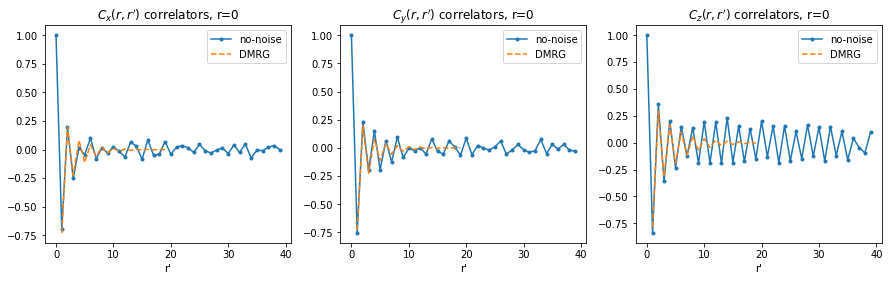

In [28]:
## Plot Correlations
basis_names = ['x','y','z']
plt.figure(figsize=(15,4))


r = 0#l_uc*L//4
x_pts_dmrg = [j for j in range(r+1,r+1+len(C_dmrg[b][0]))]
for j,b in enumerate(['x','y','z']):
    plt.subplot(1,3,j+1)
    plt.plot(Cs[b][r,:],'.-')
    plt.plot(x_pts_dmrg,C_dmrg[b][0],'--')
    #plt.plot(Cs_noise[b][r,:])
    plt.legend(['no-noise','DMRG'])
    plt.title('$C_'+b+'(r,r\')$ correlators, r={}'.format(r))
    plt.xlabel('r\'')
    
    
#plt.legend(['x','y','z'])
plt.show()


## Noisy Qiskit Simulations
Next, simulate with some realistic noise to see how it impacts energy estimates

Note: it's crucial to limit L to minimal possible (otherwise result degrades by about 15%)

### Noise model

In [29]:
## Define Noise Model ##
# errors (simulation)
perr_1q = 0.0005 # 1-qubit gate error
perr_2q = 0.005 # 2-qubit gate error
# depolarizaing errors
depol_1q = noise.depolarizing_error(perr_1q, 1)
depol_2q = noise.depolarizing_error(perr_2q, 2)
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(depol_1q, ['u1', 'u2', 'u3','rx','ry','rz'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx','cz','rxx'])

### Run Simulation

xx
yy
zz
Qiskit Energy density (noiseless,noisy) = (-1.789008620689655, -1.6041776315789473)
Rel. Error from noise: +10.33%
Tenpy Optimized energy = -1.90


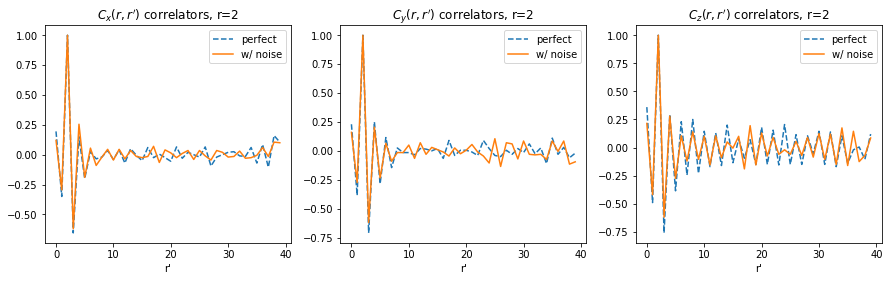

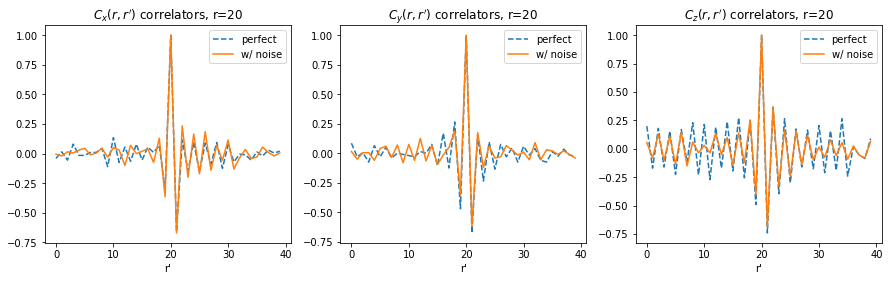

In [30]:
## QISKIT SIMULATION ##
L=20 # length of chain to simulate
burn_in = 1 # number of sites to "burn in" MPS channel before measuring
shots = 400 # number of shots for each measurement

# list of Pauli strings to measure
# example format for L = 3, l_uc = 4: [['xxxy'],['zzzz'],['yzxz']]
measurement_strings = [['x'*l_uc]*L,
                       ['y'*l_uc]*L,
                       ['z'*l_uc]*L] 

# Create meta-data
model_data = {'type':'xxz',
              'J':J,
              'Delta':Delta,
              'hz':hz,
              'L':L,
              'shots':shots,
             }
vqe_data = {'architecture':'su4_star',
                'nb':nb,
                'params':opt_params}

# loop through measurement strings, and create list of jobs to run
jobs_noise = []
for m in measurement_strings:
    psi_curr = IsoMPS(preg,breg,
                      site_pcircs,
                      boundary_circuit=bond_prep_pcirc,
                     L=L,
                     bases=m)
    circ_curr = psi_curr.construct_circuit(opt_params_with_bdry)
    jobs_noise += [{'name':'xxz_xxzstar_hz{}'.format(hz)+'_basis_'+m[0],
              'isoMPS':psi_curr,
              'vqe_data':vqe_data,
              'qiskit_circuit':circ_curr,
              'qasm':circ_curr.qasm(),
              'model':model_data,
              'basis':m,
              'shots':shots,
              'job_id':None, # job-id when submitted to honeywell
              'qiskit_results':None, # qiskit simultor results
              'results':None # Honeywell results
              }]    
    
# setup qiskit simulator
simulator = qk.Aer.get_backend('qasm_simulator')
for job in jobs_noise:
    shots = job['shots']
    job['qiskit_results'] = qk.execute(job['qiskit_circuit'], 
                               simulator, 
                               shots=shots,
                               noise_model=noise_model).result()
    
# compute two-point correlators from counts
Cs_noise = {} # dictionary of 2-point correlators
ms_noise = {} # dictionary of 1-spin correlators ('magnetizations')
for job in jobs_noise:
    print(job['basis'][0])
    counts = job['qiskit_results'].get_counts()
    key = job['basis'][0][0] #'x','y',or'z' (assumes measurements are same type on each bond)
    Cs_noise[key] = counts_to_correlators(counts,job['shots'])
    ms_noise[key] = counts_to_mean(counts,job['shots'])
N = len(list(counts.keys())[0].split(" "))

# estimate <H>
sites = np.arange(burn_in,L*l_uc-1) # remaining sites
E = 0
Cxx_qk_noise = np.mean([Cs_noise['x'][j,j+1] for j in sites])
Cyy_qk_noise = np.mean([Cs_noise['y'][j,j+1] for j in sites])
Czz_qk_noise = np.mean([Cs_noise['z'][j,j+1] for j in sites])
mz_qk_noise = np.mean(ms_noise['z'])

#for j in sites:    
#    E += job['model']['J']*(Cs['x'][j,j+1]+Cs['y'][j,j+1])
#    E += job['model']['J'] * job['model']['Delta']*Cs['z'][j,j+1]
#E += job['model']['hz'] * np.sum(ms['z'])
#E = E/sites.size # convert to energy density
E_gs_qk_noise = job['model']['J']*(Cxx_qk_noise+Cyy_qk_noise+job['model']['Delta']*Czz_qk_noise)+job['model']['hz']*mz_qk
print('Qiskit Energy density (noiseless,noisy) = {}'.format((E_gs_qk,E_gs_qk_noise)))
print('Rel. Error from noise: {:+.2f}%'.format((1-E_gs_qk_noise/E_gs_qk)*100))
print('Tenpy Optimized energy = {:+.2f}'.format(E_gs_tp))

## Plot Correlations
basis_names = ['x','y','z']
plt.figure(figsize=(15,4))
r = burn_in+1#l_uc*L//2
for j,b in enumerate(['x','y','z']):
    plt.subplot(1,3,j+1)
    plt.plot(Cs[b][r,:],'--')
    plt.plot(Cs_noise[b][r,:])
    plt.legend(['perfect','w/ noise'])
    plt.title('$C_'+b+'(r,r\')$ correlators, r={}'.format(r))
    plt.xlabel('r\'')
    
#plt.legend(['x','y','z'])
plt.show()

## Plot Correlations
basis_names = ['x','y','z']
plt.figure(figsize=(15,4))
r = l_uc*L//2
for j,b in enumerate(['x','y','z']):
    plt.subplot(1,3,j+1)
    plt.plot(Cs[b][r,:],'--')
    plt.plot(Cs_noise[b][r,:])
    plt.legend(['perfect','w/ noise'])
    plt.title('$C_'+b+'(r,r\')$ correlators, r={}'.format(r))
    plt.xlabel('r\'')
    
#plt.legend(['x','y','z'])
plt.show()

From the above correlator plots, you can see that the correlations for spins early in the chain (top row) tend to be more accurate than those in the middle of the chain (though errors do seem to saturate deep in the chain)

# Thermal state

## Functions to compute free energy

In [350]:
# inputs
T= 1.0
N_samples = 10 # number of random states to average over
L_th = 10 # number of unit cells to draw random samples for
N = l_uc*L_th # length of finite-chain MPS that we'll construct

# unitaries
us = psi.unitaries(opt_params)
H_mpo_finite = xxz_mpo_finite(J=J,hz=hz,Delta=Delta,L=N)


# single sample
def compute_energy_sample(N,prob_therm,params,psi,H_mpo):
    # draw a random number
    init_states = []
    prob_therm = np.nan_to_num(prob_therm)
    for j in range(psi.l_uc):
        if prob_therm[j]<0 or prob_therm[j]>1 or np.isnan(prob_therm[j]):
            prob_therm[j]=1e-8
        init_states += [np.random.binomial(1,prob_therm[j],L_th)]
    init_states = np.array(init_states).flatten('F') # interleaved list of initial states

    # site tensors for random state
    site = tp.networks.site.SpinHalfSite(None)
    us = psi.unitaries(params)
    
    # create site tensors with appropriate initial state
    tensors = [us[j%l_uc][:,:,init_states[j],:] for j in range(N)] 

    # code basically copied from IsoMPS.to_tenpy()
    B_arrs = [np.swapaxes(tensor,1,2) for tensor in tensors]
    B_arrs[0] = B_arrs[0][:,0:1,:]
    B_arrs[-1] = B_arrs[-1][:,:,0:1]
    psi_rand_tp = tp.networks.mps.MPS.from_Bflat([site]*N,
                                            B_arrs, 
                                            bc = 'finite', 
                                            dtype=complex, 
                                            form=None) 
    psi_rand_tp.canonical_form()
    psi_rand_tp.convert_form(psi_rand_tp.form)
    E_sample = (H_mpo_finite.expectation_value(psi_rand_tp)).real/N
    return E_sample

#def energy_random_state(x,*args):
#def energy_random_state(prob_therm,param_dict,psi,H_mpo,N_samples,N):
#    Es = [compute_energy_sample(N,param_dict,psi,H_mpo) for j in range(N_samples)]
#    return np.mean(Es)

def entropy(x):
    x=(x<(1-1e-15))*(x>1e-15)*x+5e-15 # trim x to be 0<x<1
    ent = (-x*np.log(x)-(1.0-x)*np.log(1.0-x))
    return np.nan_to_num(ent,nan=0.0)

def free_energy_random_state(x,*args):
    psi=args[0]
    H_mpo = args[1]
    N_samples = args[2]
    N = args[3]
    T = args[4]
    
    prob_therm = np.abs(np.sin(x[0:psi.l_uc]))**2 
    circ_param_vals = x[psi.l_uc:]
    param_dict = dict(zip(psi.param_list,circ_param_vals))

    #E = energy_random_state(x,args)/N
    #E = energy_random_state(prob_therm,param_dict,psi,H_mpo,N_samples,N)/N
    Es = [compute_energy_sample(N,prob_therm,param_dict,psi,H_mpo) for j in range(N_samples)]
    E = np.mean(Es)
    F = E - T*np.mean(entropy(np.array(prob_therm)))
    return F

x0 = [-1.57,0.0] + list(opt_vals)
args = (psi,H_mpo,N_samples,N,T)
print('Random state (Energy,Free-energy): {}'.format(free_energy_random_state(x0,psi,H_mpo_finite,N_samples,N,T)))
# Compare to pure state result at T=0
#H_mpo = xxz_mpo(J=J,hz=hz,Delta=Delta)
print('Pure state Energy: {}'.format(energy_tp(opt_vals,psi,H_mpo)))

Random state (Energy,Free-energy): 1.1874951580522184
Pure state Energy: -1.901016250587692


In [348]:
entropy(0)

x 5e-15 5e-15


1.6964269602319614e-13

### Gradient descent function

In [316]:
# finite difference gradient
def grad_fd(fun,x,dx,*args):
    """
    fun - function of \mathbb{R}^D
    x - point to differentiate (np array)
    dx - step size (scalar)
    returns:
        gradient (np.array), f0 - value of function at starting point
    """
    D = x.size
    f0 = fun(x,*args)
    grad = np.zeros(D)
    for j in range(D):
        x_new = x.copy()
        x_new[j] = x[j]+dx
        grad[j] = (fun(x_new,*args)-f0)/dx
    return grad,f0

def grad_desc(fun,x0,a,dx,n_steps,*args):
    """
    does n_steps (int) iterations of gradient descent on function: fun
    with step size a, and gradient finite-difference step dx,
    starting from point x0
    """
    xs = []
    fs = []
    x_curr = x0
    for j in range(n_steps):
        grad,f = grad_fd(fun,x_curr,dx,*args)
        xs+=[x_curr]
        fs+=[f]
        print('----')
        print('Iteration {}'.format(j)+', f={}'.format(f))
        print(xs[0:2])
        x_curr -= a*grad#/(1+np.sqrt(np.sum(np.abs(grad)**2))
    f_final = fun(x_curr,*args)
    return xs,fs,f_final

def test_fun(x,*args):
    return (x[0]-1)**2+(x[1]-2)**2


In [321]:
x0 = np.array([0.25,0.25] + list(opt_params.values())) # starting point for parameters
xs,fs,f_final = grad_desc(free_energy_random_state,
                         x0,
                         0.03, #grad-desc step size
                         0.1, # finite-difference size
                         10, # number of grad-desc steps
                         psi,H_mpo_finite,N_samples,N,T)
print('grad-desc done, final f: {}'.format(f_final))


----
Iteration 0, f=-6.159583055371348
[array([ 0.25      ,  0.25      ,  0.80332451,  3.30297577, -1.95641068,
        1.19708645, -1.48804918,  3.458847  , -0.71014904, -2.61950496])]
----
Iteration 1, f=-6.024355993185164
[array([ 0.31794892,  0.19355759,  0.78536986,  3.2539378 , -1.96092009,
        1.15658243, -1.50192887,  3.3994267 , -0.72181061, -2.59848474]), array([ 0.31794892,  0.19355759,  0.78536986,  3.2539378 , -1.96092009,
        1.15658243, -1.50192887,  3.3994267 , -0.72181061, -2.59848474])]
----
Iteration 2, f=-6.605858216878567
[array([ 0.39288785,  0.34416521,  0.81266811,  3.20232953, -1.97949306,
        1.17347045, -1.47006432,  3.33599312, -0.67487504, -2.51591487]), array([ 0.39288785,  0.34416521,  0.81266811,  3.20232953, -1.97949306,
        1.17347045, -1.47006432,  3.33599312, -0.67487504, -2.51591487])]
----
Iteration 3, f=-6.751230119355725
[array([ 0.41953464,  0.35644909,  0.79878657,  3.29213912, -1.98603574,
        1.22442046, -1.40232219,  3.31

## Optimize free energy

In [362]:
T=0
x0 = [0.1,0.1] + list(opt_params.values()) # starting point for parameters
t0 = time.time()

options = {'gtol': 0.03, 
           'eps': 0.03, 
           'maxiter': 10, 
           'disp': True, 
           'finite_diff_rel_step': 0.03}

thermal_opt_result = minimize(free_energy_random_state, # function to minimize
                      x0, # starting point for parameters 
                      args=(psi,H_mpo_finite,N_samples,N,T), # must take form (isoMPS,tenpy MPO, Length)
                      method='BFGS',
                     )
tf = time.time()
# set parameters to previously optimized values
thermal_opt_vals = thermal_opt_result.x
thermal_opt_params = dict(zip(psi.param_list,thermal_opt_vals))
F_tp = thermal_opt_result.fun
print('Optimization done, elapsed time: {}'.format(tf-t0))
print('Optimized free-energy = {}'.format(F_tp))
print('Optimized parameters')
print(thermal_opt_params)

therm_results[T] = thermal_opt_result # store for various T in dictionary

Optimization done, elapsed time: 272.4131848812103
Optimized free-energy = -1.8080322918281921
Optimized parameters
{Parameter(s0_0): 0.09999832127448328, Parameter(s0_1): 0.09999933258826105, Parameter(s0_2): 0.8033247582322092, Parameter(s0_3): 3.302974265037784, Parameter(s1_0): -1.9564117445290488, Parameter(s1_1): 1.197086432037039, Parameter(s1_2): -1.488049189311719, Parameter(s1_3): 3.458846329859802}


# Dynamics